<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lessom7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1089]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [1090]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [1091]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,NaN,15000.0,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner
4742,2022-05-15,3.0,29000.0,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner
4743,2022-07-10,3.0,35000.0,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent
4744,2022-07-06,3.0,45000.0,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent


**`використовую дані, які не ламають передбачення`**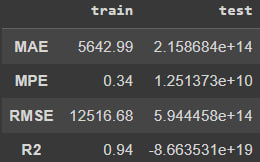
**`метрики з усіма даними`**

In [1092]:
df = df[['Rent', 'Size', 'Furnishing Status', 'City', 'BHK','Area Type', 'Tenant Preferred', 'Bathroom', 'Point of Contact']]
#df = df.drop(columns='Floor')
#df = df.drop(columns='Area Locality')
df

,Rent,Size,Furnishing Status,City,BHK,Area Type,Tenant Preferred,Bathroom,Point of Contact
0,10000.0,1100.0,Unfurnished,Kolkata,2.0,NaN,Bachelors/Family,2.0,Contact Owner
1,20000.0,800.0,Semi-Furnished,Kolkata,2.0,Super Area,Bachelors/Family,1.0,NaN
2,17000.0,1000.0,Semi-Furnished,Kolkata,2.0,Super Area,Bachelors/Family,1.0,Contact Owner
3,10000.0,800.0,Unfurnished,Kolkata,2.0,Super Area,Bachelors/Family,1.0,Contact Owner
4,7500.0,850.0,Unfurnished,Kolkata,2.0,Carpet Area,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,15000.0,1000.0,Semi-Furnished,Hyderabad,NaN,Carpet Area,Bachelors/Family,2.0,Contact Owner
4742,29000.0,2000.0,Semi-Furnished,Hyderabad,3.0,Super Area,Bachelors/Family,3.0,Contact Owner
4743,35000.0,1750.0,Semi-Furnished,Hyderabad,3.0,Carpet Area,Bachelors/Family,3.0,Contact Agent
4744,45000.0,1500.0,Semi-Furnished,Hyderabad,3.0,Carpet Area,Family,2.0,Contact Agent


# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини

In [1093]:
df.describe(include=['number']).round(2)

,Rent,Size,BHK,Bathroom
count,4369.00,4402.00,4342.00,4387.00
mean,34613.06,967.21,2.08,1.97
std,77408.18,636.12,0.83,0.89
min,1200.00,10.00,1.00,1.00
25%,10000.00,550.00,2.00,1.00
50%,16000.00,850.00,2.00,2.00
75%,33000.00,1200.00,3.00,2.00
max,3500000.00,8000.00,6.00,10.00


In [1094]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rent               4369 non-null   float64
 1   Size               4402 non-null   float64
 2   Furnishing Status  4395 non-null   object 
 3   City               4388 non-null   object 
 4   BHK                4342 non-null   float64
 5   Area Type          4390 non-null   object 
 6   Tenant Preferred   4372 non-null   object 
 7   Bathroom           4387 non-null   float64
 8   Point of Contact   4372 non-null   object 
dtypes: float64(4), object(5)
memory usage: 370.8+ KB


In [1095]:
df.isnull().sum()

Rent                 377
Size                 344
Furnishing Status    351
City                 358
BHK                  404
Area Type            356
Tenant Preferred     374
Bathroom             359
Point of Contact     374
dtype: int64

In [1096]:
X = df.drop(columns='Rent')
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3796
Testing set size: 950


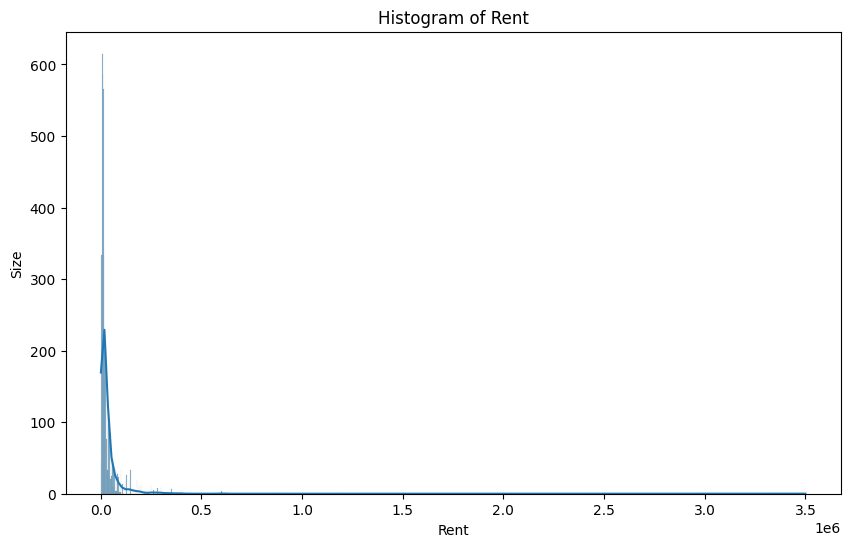

In [1097]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True)
plt.title(f'Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Size')
plt.show()

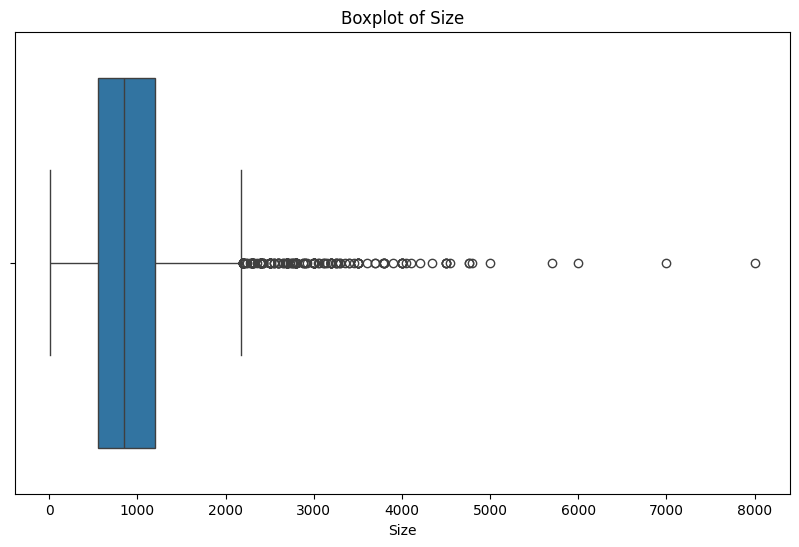

In [1098]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Size'])
plt.title(f'Boxplot of Size')
plt.xlabel('Size')
plt.show()

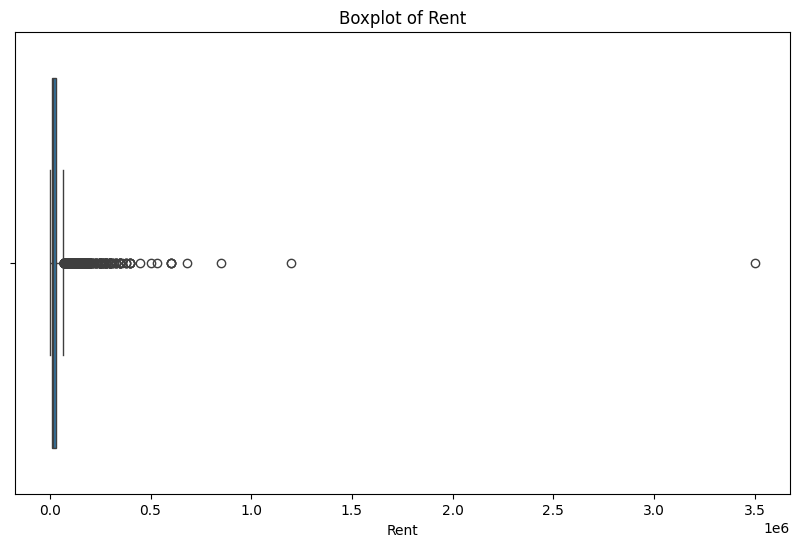

In [1099]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rent'])
plt.title(f'Boxplot of Rent')
plt.xlabel('Rent')
plt.show()

видалимо вручну аномально великі дані, їх краще розглядати індивідуально

In [1100]:
df = df[df['Rent'] <= 1000000]

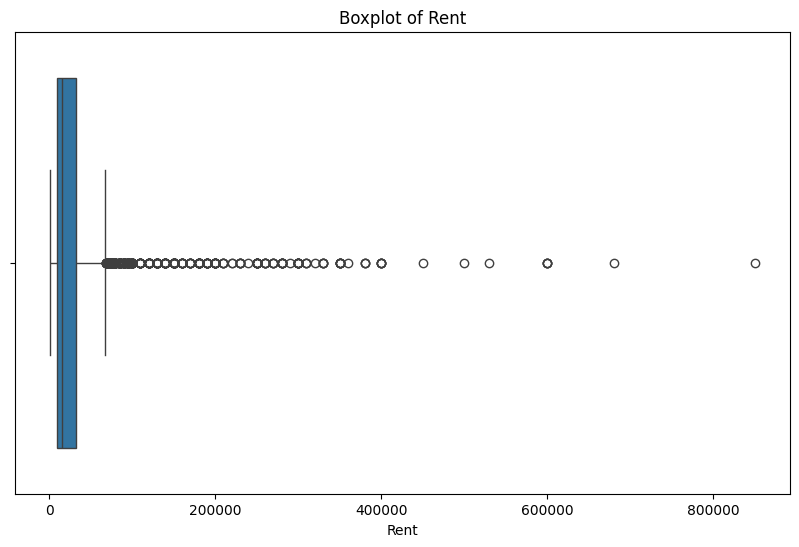

In [1101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rent'])
plt.title(f'Boxplot of Rent')
plt.xlabel('Rent')
plt.show()

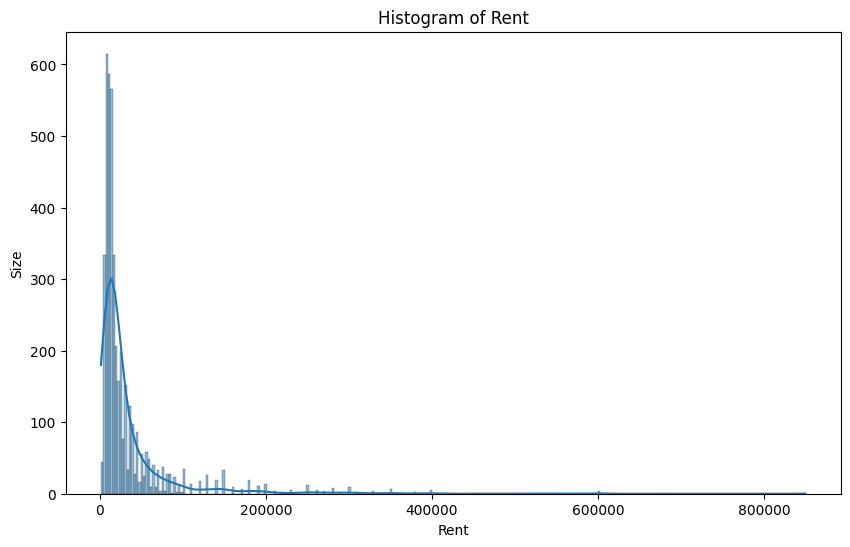

In [1102]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True)
plt.title(f'Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Size')
plt.show()

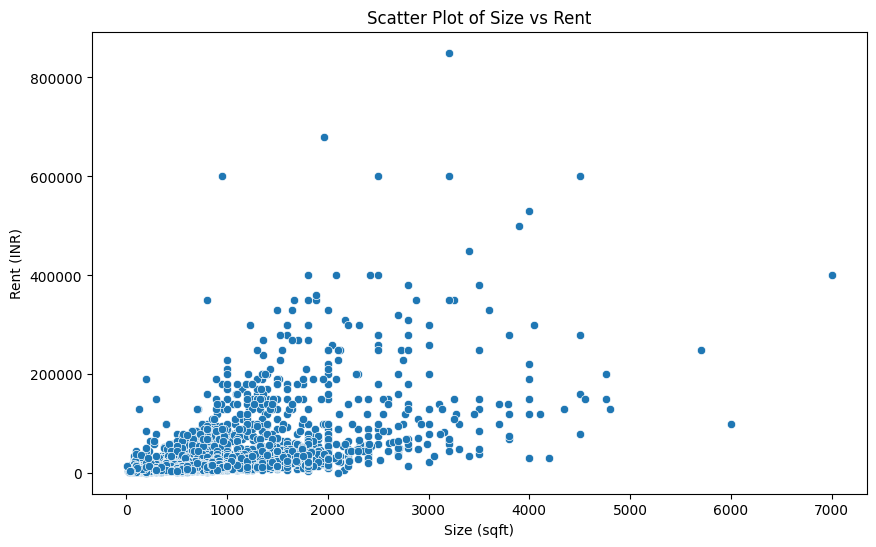

In [1103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title('Scatter Plot of Size vs Rent')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent (INR)')
plt.show()

In [1104]:
df.describe(include=['number']).round(2)

,Rent,Size,BHK,Bathroom
count,4367.00,4048.00,3993.00,4035.00
mean,33552.66,965.63,2.08,1.97
std,54148.19,626.75,0.83,0.88
min,1200.00,10.00,1.00,1.00
25%,10000.00,550.00,2.00,1.00
50%,16000.00,850.00,2.00,2.00
75%,33000.00,1200.00,3.00,2.00
max,850000.00,7000.00,6.00,7.00


In [1105]:
X = df.drop(columns='Rent')
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3493
Testing set size: 874


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [1106]:
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [1107]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=1500, weights='uniform')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1500)),
                ('scaler', StandardScaler())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [1108]:
categorical_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')),
        ("imputer", KNNImputer(n_neighbors=1500, weights='uniform'))
    ]
)
categorical_transformer

Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False)),
                ('imputer', KNNImputer(n_neighbors=1500))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [1109]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=1500)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Size', 'BHK', 'Bathroom'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False)),
                                                 ('imputer',
                                                  KNNImputer(n_neighbors=1500))]),
                                 Index(['Furnishing Status', 'City', 'Area Type', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object'))])

In [1110]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

,num__Size,num__BHK,num__Bathroom,cat__Furnishing Status_Furnished,cat__Furnishing Status_Semi-Furnished,cat__Furnishing Status_Unfurnished,cat__Furnishing Status_nan,cat__City_Bangalore,cat__City_Chennai,cat__City_Delhi,...,cat__Area Type_Super Area,cat__Area Type_nan,cat__Tenant Preferred_Bachelors,cat__Tenant Preferred_Bachelors/Family,cat__Tenant Preferred_Family,cat__Tenant Preferred_nan,cat__Point of Contact_Contact Agent,cat__Point of Contact_Contact Builder,cat__Point of Contact_Contact Owner,cat__Point of Contact_nan
3126,-0.538853,-1.353642,-1.132623,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2256,-1.269338,-1.353642,-1.132623,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
738,-0.881172,-1.353642,0.053509,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3621,-0.602959,-1.353642,-1.132623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2753,-0.103175,-0.092938,0.053509,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,-0.038203,-0.092938,0.053509,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
497,-0.436364,-0.092938,0.053509,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3358,-0.101509,-0.092938,0.053509,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4094,0.288323,-0.092938,0.154726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Завдання 5
Створіть остаточну модель та натренуйте її

In [1111]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1500)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'BHK', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False)),
                                                                  ('imputer',
                                                                   KNNImputer(n_neighbors=1500))]),
                                                  Index(['Furnishing Status', 'City', 'Area Type', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [1112]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1500)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'BHK', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False)),
                                                                  ('imputer',
                                                                   KNNImputer(n_neighbors=1500))]),
                                                  Index(['Furnishing Status', 'City', 'Area Type', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [1113]:
y_pred = model.predict(X_test)

# Завдання 6
Виведіть основні метрики моделі

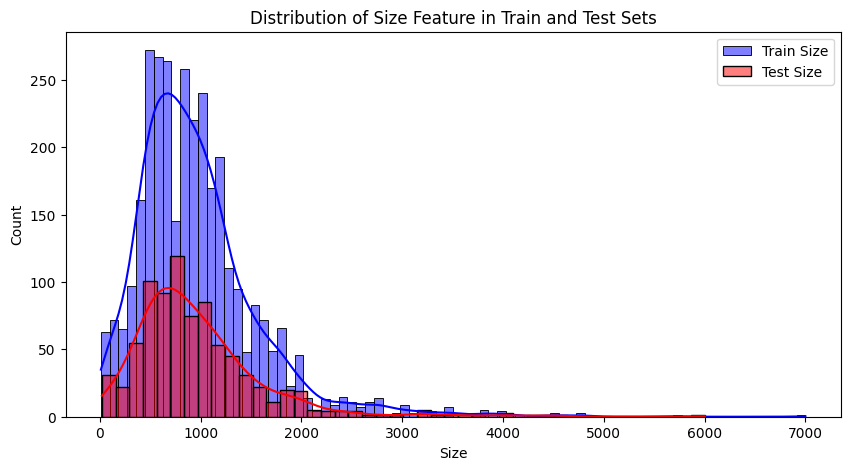

In [1114]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train['Size'], kde=True, color='blue', label='Train Size')
sns.histplot(X_test['Size'], kde=True, color='red', label='Test Size')
plt.legend()
plt.title('Distribution of Size Feature in Train and Test Sets')
plt.show()

In [1115]:
print(X_train.describe())
print(X_test.describe())

              Size          BHK     Bathroom
count  3231.000000  3191.000000  3228.000000
mean    966.523058     2.082106     1.964994
std     621.259716     0.822964     0.871873
min      10.000000     1.000000     1.000000
25%     550.000000     2.000000     1.000000
50%     850.000000     2.000000     2.000000
75%    1200.000000     3.000000     2.000000
max    7000.000000     6.000000     7.000000
              Size         BHK    Bathroom
count   817.000000  802.000000  807.000000
mean    962.095471    2.074813    1.983891
std     648.374132    0.840242    0.916346
min      20.000000    1.000000    1.000000
25%     550.000000    2.000000    1.000000
50%     800.000000    2.000000    2.000000
75%    1200.000000    3.000000    2.000000
max    6000.000000    6.000000    7.000000


In [1116]:
def get_metrics(y_true, y_pred, name='Value'):
    df = pd.DataFrame()
    df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
    df.loc["MPE", name] = metrics.mean_absolute_percentage_error(y_true, y_pred)
    df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
    df.loc["R2", name] = metrics.r2_score(y_true, y_pred)
    return df.round(2)

In [1117]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [1118]:
all_metrics

,train,test
MAE,19514.10,23095.36
MPE,1.03,1.12
RMSE,34761.95,46858.01
R2,0.54,0.46


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [1119]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai'],
                     'Bathroom': [np.nan],
                     'Area Type': ['Carpet Area'],
                     'Point of Contact': ['Contact Owner'],
                     'Tenant Preferred': ['Bachelors/Family'],
                     'BHK': [np.nan]
                     })

data

,Size,Furnishing Status,City,Bathroom,Area Type,Point of Contact,Tenant Preferred,BHK
0,900,Semi-Furnished,Mumbai,NaN,Carpet Area,Contact Owner,Bachelors/Family,NaN


In [1120]:
model.predict(data)

array([66670.07765848])